# Spatial Data Models

## What is a Spatial Data Model?

A **spatial data model** is a conceptual framework used to represent real-world geographic features in a structured and organized way. It defines how spatial features are represented, stored, and processed in GIS.

There are two main types of spatial data models:

1. **Vector data model**
   Represents geographic features as discrete geometric objects:

   - **Points** (e.g. location of a bus stop)
   - **Lines** (e.g. roads, rivers)
   - **Polygons** (e.g. building footprints, administrative boundaries)

2. **Raster data model**
   Represents the world as a continuous surface divided into a regular grid of cells (pixels), each containing a value (e.g. satellite imagery, elevation data).


### Import libraries


At the start of each module, we will import the libraries needed for specific tasks, along with a short description and a link to the library’s documentation


In [2]:
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon

- [**GeoPandas**](https://geopandas.org/) (`geopandas`) — an extension of pandas that makes working with geospatial data easy. It allows you to read, manipulate, and analyze spatial datasets in various formats.

- [**Shapely**](https://shapely.readthedocs.io/) (`shapely.geometry`) — a library for creating and working with geometric objects like Points, LineStrings, and Polygons


## Vector Data


In this section, we’ll explore how vector data is structured, how to create and manipulate it using Python

Geometric objects are built from coordinate tuples and come in several basic types:

- A **Point** represents a single location in space, defined by either two (x, y) or three (x, y, z) coordinates.
- A **LineString** represents a continuous line made up of at least two connected points, forming a path.
- A **Polygon** defines an enclosed area using a minimum of three coordinate tuples that form the outer boundary (also known as the exterior ring). It can also include one or more interior rings (holes).

In addition to these simple geometries, there are also **collections of geometries**, used when multiple shapes are grouped together:

- A **MultiPoint** is a set of individual points.
- A **MultiLineString** is a group of LineStrings, each made of connected points.
- A **MultiPolygon** consists of multiple polygons, each with its own outer boundary and optionally inner holes.


### Points

Points represent features that have a specific location but no area or length. For example, a single tree, a bus stop, or a measurement station.

Let's create a point based on known coordinates - longitude and latitude


POINT (16.36736 48.198942)
<class 'shapely.geometry.point.Point'>


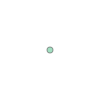

In [3]:
# Defining the coordinates
long = 16.367360
lat = 48.198942

# Creating a Point
point = Point(long, lat)

#Looking at the result
print(point)
print(type(point))
display(point)

The `Point` object we see is from **Shapely**, and it follows a format based on the **GEOS** library — the geometry engine behind many GIS tools such as PostGIS and QGIS.

While a `Point` on its own simply represents a location in space, we can make it much more useful by turning it into a **GeoDataFrame** using the **GeoPandas** library.

A **GeoDataFrame** is an extension of a regular pandas DataFrame that includes a special `geometry` column for storing geometric objects. It allows us to store not only the spatial coordinates, but also additional **attributes** (such as name, type, or ID)


In [4]:
# creating additional attributes
data = {
    'name': ['Technical University of Vienna'],
    'type': ['University'],
    'geometry': [point]
}

# creating geodataframe, identifiying coordinate reference system
gdf = gpd.GeoDataFrame(data, crs="EPSG:4326")

# looking at the result
print(type(gdf))
gdf

<class 'geopandas.geodataframe.GeoDataFrame'>


,name,type,geometry
0,Technical University of Vienna,University,POINT (16.36736 48.19894)


The data format does indeed resemble a regular DataFrame, but there's one key difference: it includes a special **geometry** column. This column defines the **spatial location** of each object, making it possible to perform geographic operations.


Let’s display the point on a map using the `explore()` method.
To make sure it works correctly, you need to have the following libraries installed:

- **folium** – for rendering interactive web maps
- **mapclassify** – used for classifying data (e.g. color scales, legends)


In [5]:
# display the result on an interactive map
gdf.explore(tiles='cartodbpositron')

Indeed, this is not just a random point with coordinates — it’s **geospatial data**.
By specifying a coordinate reference system, we know exactly where this object is located in our beautiful planet.


### Lines

**Lines** represent features that have **length** but no area. They are used to model linear objects such as roads, rivers, or hiking trails — essentially, anything that extends between two or more points.

Since we've already gone through the steps with a point, we'll now go straight to creating a **GeoDataFrame** from a line and visualizing it on a map.


In [6]:
long = 16.367360
lat = 48.198942

# defining coordinates
coords_line = [
    (16.367360, 48.198942), 
    (16.370267, 48.196514), 
    (16.369908, 48.198917)

]

# creating a linestring
line = LineString(coords_line)

gdf_line = gpd.GeoDataFrame([{'geometry': line}], crs="EPSG:4326")

gdf_line.explore(tiles='cartodbpositron')

### Polygons

**Polygons** represent features that have both **area and boundaries**. They are used to model enclosed spaces such as buildings, parks, lakes, districts, and other geographic regions. A polygon is defined by a sequence of coordinates that form a closed ring — the first and last points must be the same.

Since we’ve already created a line from real landmarks in Saint Petersburg, let’s now turn those same coordinates into a **Polygon**, create a **GeoDataFrame**, and visualize it on a map.


In [7]:
# creating a polygon
polygon =  Polygon(coords_line)

gdf_polygon = gpd.GeoDataFrame([{'geometry': polygon}], crs="EPSG:4326")

gdf_polygon.explore(tiles='cartodbpositron')


## Summary

In this section, we explored the foundations of **spatial data models**, focusing on the **vector model**.
We learned how real-world geographic features can be represented as **points**, **lines**, and **polygons**, and how to work with these geometries using Python libraries like **Shapely** and **GeoPandas**.

You now know how to:

- Create basic geometric objects from coordinates
- Store them in a GeoDataFrame
- Enrich them with attributes and visualize them on a simple interactive map
